In [1]:
import requests, json, matplotlib.pyplot as plt
import pandas as pd, numpy as np

In [2]:
def show(data):
    for name, value in data.items():
        # calculating sum and mean
        market_sum = np.sum(value["data"]["price"])
        market_mean = np.true_divide(market_sum, len(value["data"]["market"]))
        print("\n{} market Sum: {} and it's Mean: {}".format(name, market_sum, market_mean))
        # wiring up data into plot
        fig, ax = plt.subplots()
        fig.set_size_inches(20,8)
        ax.plot(value["data"]["market"], value["data"]["price"], value["color"][0])
        ax.set_xlabel("Market", color=value["color"][1], fontsize=16)
        ax.tick_params('x', colors=value["color"][1], labelsize=16)
        ax.set_ylabel(name, color=value["color"][1], fontsize=22)
        ax.tick_params('y', colors=value["color"][1], labelsize=22)
    # show all plots that we are wiring up
    plt.show()

In [3]:
def fetch():
    btc_r = requests.get("https://api.cryptonator.com/api/full/btc-usd")
    eth_r = requests.get("https://api.cryptonator.com/api/full/eth-usd")
    btc_markets = btc_r.json()["ticker"]["markets"]
    eth_markets = eth_r.json()["ticker"]["markets"]
    btc_df = pd.read_json(json.dumps(btc_markets))
    eth_df = pd.read_json(json.dumps(eth_markets))
    show({"btc": {"data": btc_df, "color":["b-", "b"]}, "eth": {"data": eth_df, "color":["g-", "g"]}})


btc market Sum: 84235.7099412 and it's Mean: 6479.669995476923

eth market Sum: 2574.4086328199996 and it's Mean: 214.53405273499996


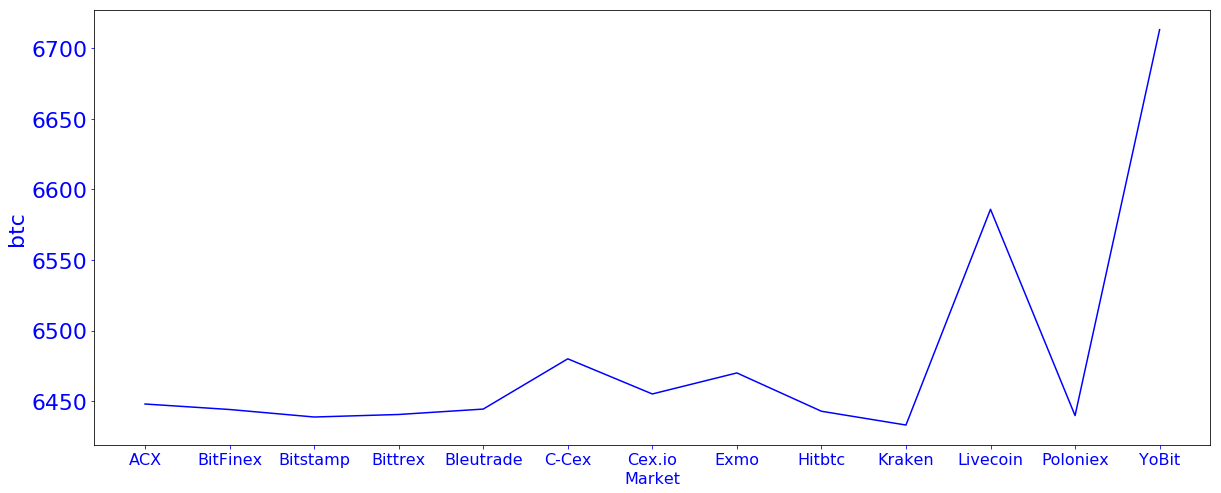

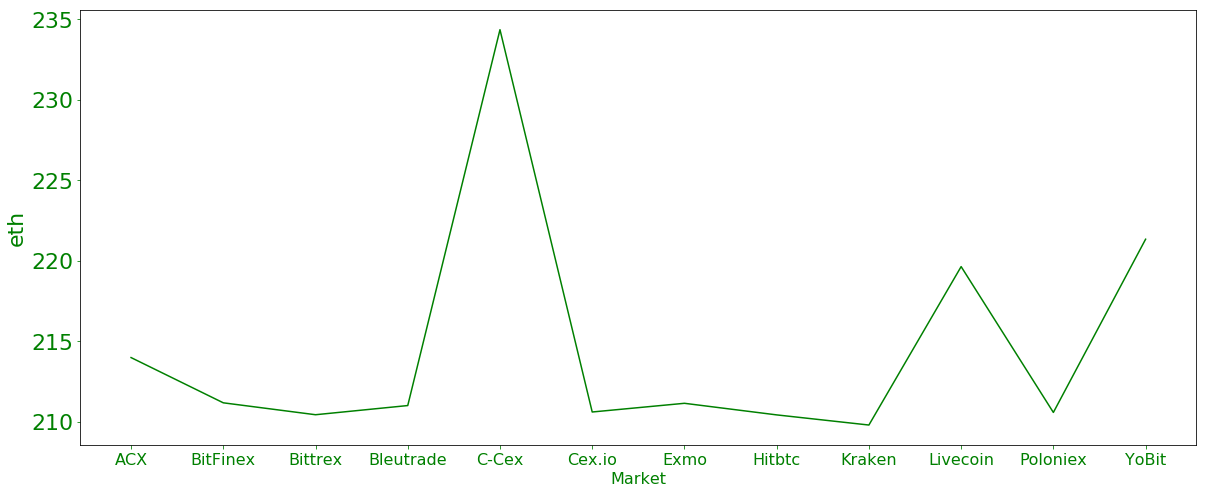

In [4]:
fetch()